# TASK TWO CODSOFT

>AUTHOR : William Onsare Morara

>email : williammorara28@gmail.com

## Business problem
The Movie Rating Prediction project involves analyzing a dataset containing information about Indian movies. The dataset includes details like movie name, year, duration, genre, rating, votes, director, and three main actors. The data will be used to build a predictive model for movie ratings and extract valuable insights from the movie industry.

## **Business Understanding**
The film industry relies on understanding the factors that influence movie success. Accurately predicting movie ratings can aid in decision-making, such as choosing the right actors, directors, and genres, as well as determining marketing strategies. This project aims to provide insights and a model for predicting movie ratings, which can be invaluable for stakeholders in the movie industry.

### Objectives
## Main objective

* To  develop a model that can predict movie rating.

## specific objectives

* To Identify the most influential factors

* To get the explaratory data anlysis of the dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
# preview the dataset
movies_df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
#checking the number of rows and columns

movies_df.shape

(15509, 10)

In [4]:
#get information about the dataset

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
# get summary statistics of the datset

movies_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [6]:
# checking columns

movies_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

The columns in this dataframe are:

``Name``: Movie name   
``Year``: release year of the movies   
``Duration``: Movie duration   
``Genre``: Movie genre    
``Rating``: Movie rating    
``Votes``: Number of votes received    
``Director``: Movie director   
``Actor 1``: First main actor    
``Actor 2``: Second main actor    
``Actor 3``: Third main actor   


## Data Preparation

In [7]:
# checking for missing values

movies_df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
# checking for duplicates

movies_df.duplicated().sum()

6

## Sorting missing values

In [9]:
#dealing with missing values

movies_df.dropna(subset=['Rating'], inplace=True)
movies_df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)
movies_df['Genre'].fillna('Unknown', inplace=True)
movies_df['Duration'] = movies_df['Duration'].str.extract(r'(\d+)').astype(float)
movies_df['Duration'].fillna(movies_df['Duration'].median(), inplace=True)


In [10]:
movies_df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

Change the data type of both Year and Votes column to numerical data types

In [11]:
movies_df['Year'] = movies_df['Year'].str.extract(r'(\d+)').astype(int)
movies_df['Votes'] = movies_df['Votes'].str.extract(r'(\d+)').astype(int)

In [12]:
movies_df.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [13]:
#prepared dataset
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Checking for outliers and removing them

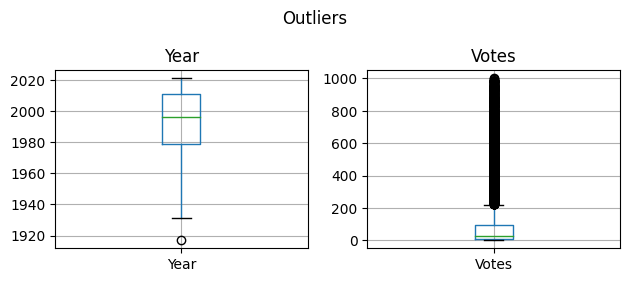

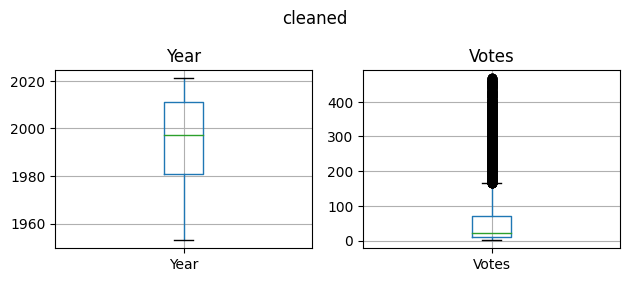

In [14]:

#numerical columns we want to check for outliers are year and votes
numerical_columns = ['Year', 'Votes']
plt.suptitle('Outliers')

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    movies_df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (movies_df[column] - movies_df[column].mean()) / movies_df[column].std()

z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]


# Removing outliers and creating a new dataframe
movies_df = movies_df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.suptitle('cleaned')
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    movies_df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout();


# EDA

### Univariate analysis

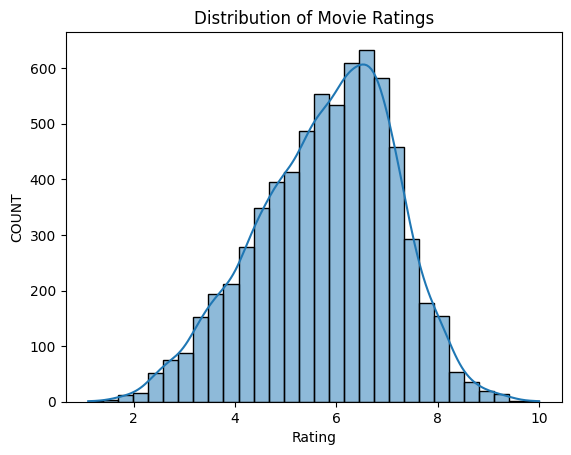

In [15]:
# rating
sns.histplot(data=movies_df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('COUNT');


* All ratings are positive 
* There are few movies rated below 2 and above 8

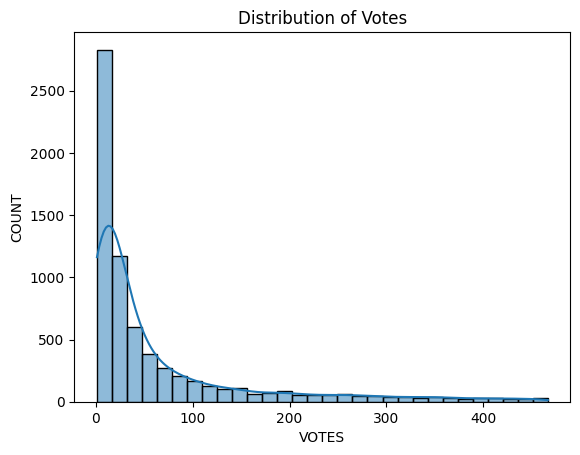

In [16]:
#Votes
sns.histplot(data=movies_df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('VOTES')
plt.ylabel('COUNT');


* The distribution of votes is right-skewed, with the majority of movies receiving a relatively low number of votes. T
* Popularity Range is between 0 and 50



## Directors

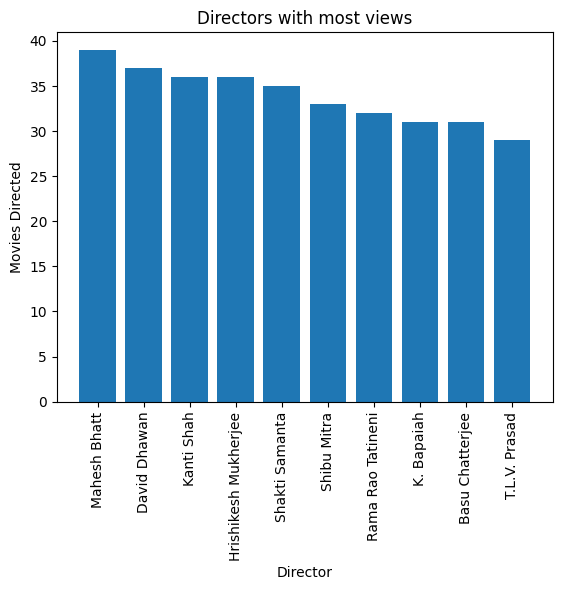

In [17]:
# Counts directed

director_counts = movies_df['Director'].value_counts()
most_directed = director_counts.head(10)

# we use barplot for easycomparison
plt.bar(most_directed.index, most_directed.values),
plt.title('Directors with most views')
plt.xlabel('Director')
plt.ylabel('Movies Directed')
plt.xticks(rotation=90);


## Actors

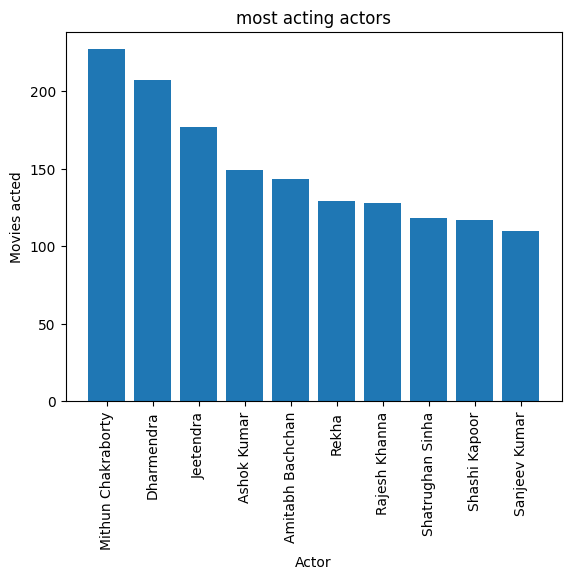

In [18]:
#movies acted
actor_counts = movies_df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()
most_acted = actor_counts.head(10)

# bar plot for easy comparison
plt.bar(most_acted.index, most_acted.values)
plt.title('most acting actors')
plt.xlabel('Actor')
plt.ylabel('Movies acted')
plt.xticks(rotation=90);

## Bivariate Analysis

## Directors and best rated

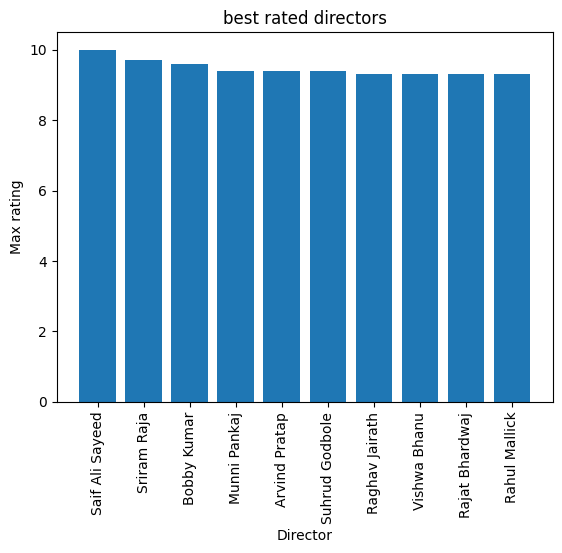

In [19]:
# maximum rated
directors_max_rating = movies_df.groupby('Director')['Rating'].max()
top_10_directors = directors_max_rating.sort_values(ascending=False).head(10)

plt.bar(top_10_directors.index, top_10_directors.values)
plt.title('best rated directors')
plt.xlabel('Director')
plt.ylabel('Max rating')
plt.xticks(rotation=90);


## Best Rated Movie Genres

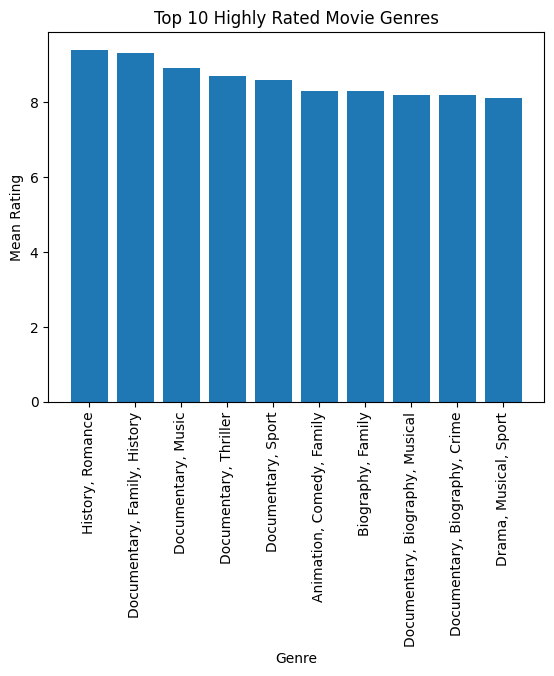

In [20]:
# Group the data by genre and calculate the mean rating for each genre
genre_mean_ratings = movies_df.groupby('Genre')['Rating'].mean()
top_10_genres = genre_mean_ratings.sort_values(ascending=False).head(10)


plt.bar(top_10_genres.index, top_10_genres.values)
plt.title('Top 10 Highly Rated Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90);


## 10 Years with Highest Ratings 

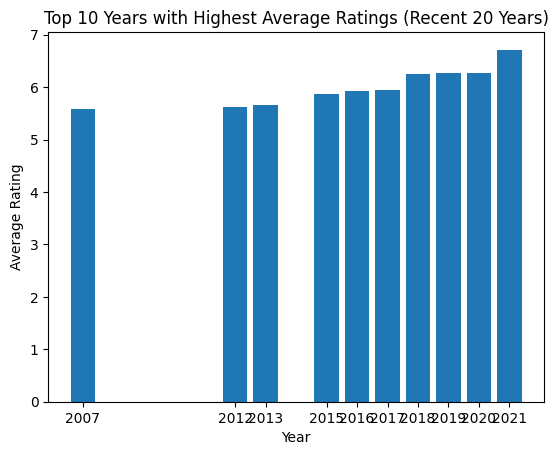

In [21]:
# Filter the DataFrame for the most recent 20 years
recent_years = movies_df[movies_df['Year'] >= (max(movies_df['Year']) - 19)]
average_ratings = recent_years.groupby('Year')['Rating'].mean().reset_index()
top_10_years = average_ratings.nlargest(10, 'Rating')


plt.bar(top_10_years['Year'], top_10_years['Rating'])
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Top 10 Years with Highest Average Ratings (Recent 20 Years)')
plt.xticks(top_10_years['Year']);


## Multivariate Analysis

#### Correlation Matrix

#### Pairplot

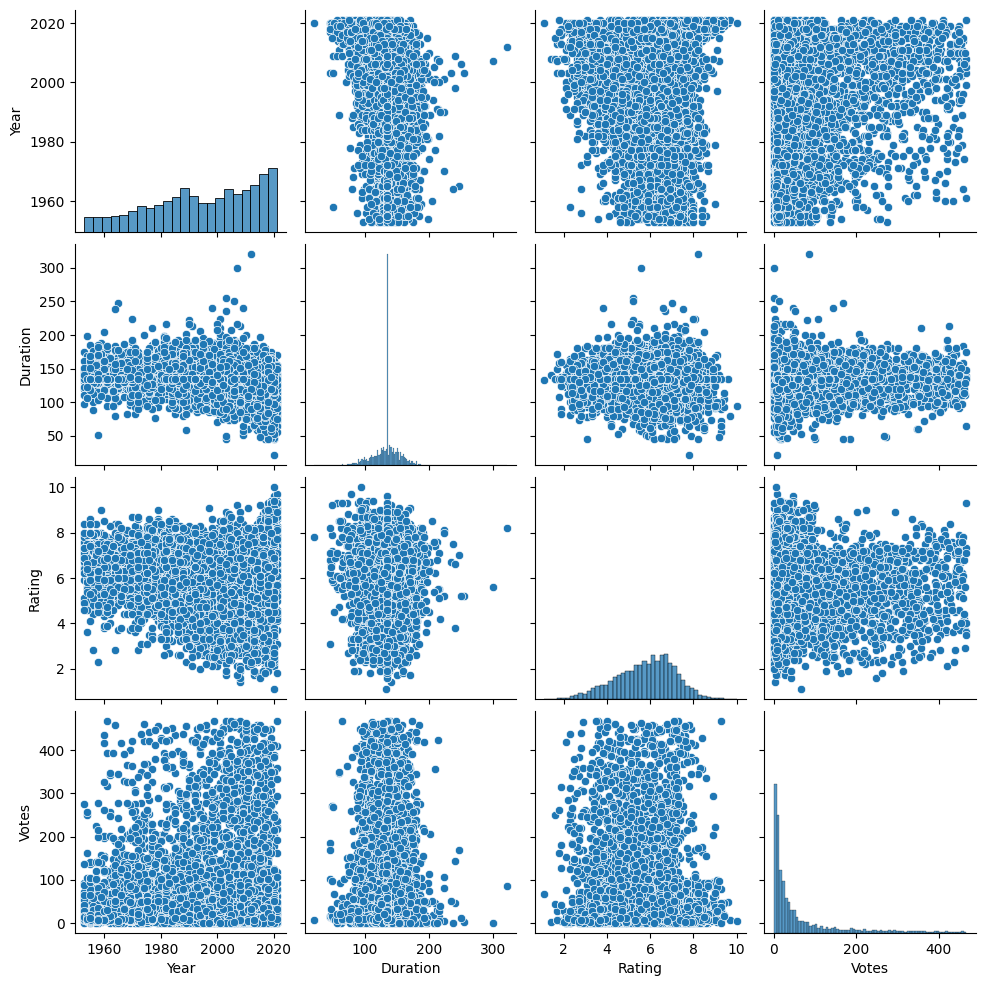

In [22]:
#pair plot
numerical_columns = movies_df.select_dtypes(include=['number'])
sns.pairplot(numerical_columns);

## **Data Preprocessing**

In [23]:
X = movies_df.drop('Rating', axis=1)
y = movies_df['Rating']

In [24]:

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor


In [25]:
# categorical columns to be one-hot encoded
categorical_columns = ['Name', 'Genre', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Scaling Numerical Features  


In [26]:
# numerical columns to be scaled
numerical_columns = ['Year', 'Duration', 'Votes']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
X_numeric_scaled = scaler.fit_transform(X[numerical_columns])

X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_columns)
X_numeric_scaled_df.head()

,Year,Duration,Votes
0,0.970588,0.293333,0.015021
1,0.970588,0.296667,0.072961
2,0.764706,0.403333,0.000000
3,0.867647,0.203333,0.697425
4,0.897059,0.316667,0.021459


In [27]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,0.970588,0.293333,0.015021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.970588,0.296667,0.072961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.403333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.867647,0.203333,0.697425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.897059,0.316667,0.021459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scaling y

In [28]:
# Instantiate StandardScaler
scaler = MinMaxScaler()

# Reshape 'Rating' to a 2D array for StandardScaler
y_scaled = scaler.fit_transform(movies_df['Rating'].values.reshape(-1, 1))
y = pd.DataFrame(y_scaled, columns=['Rating'])
y


,Rating
0,0.662921
1,0.370787
2,0.707865
3,0.505618
4,0.325843
...,...
6841,0.426966
6842,0.471910
6843,0.528090
6844,0.393258


### Train-Test Split 


In [29]:
# Split the data into training and testing data 

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

## **Modeling**

In [30]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = lr_model.predict(X_test)
y_pred_train = lr_model.predict(X_train)

In [31]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print(f"Test Mean Squared Error : {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")

print(f"Train Mean Squared Error : {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Test Mean Squared Error : 0.019567697173637773
Test R-squared (R^2) Score: 0.16031780106423832
Train Mean Squared Error : 2.1376423350532958e-29
Train R-squared (R^2) Score: 1.0


The model demonstrates severe overfitting and poor predictive performance on the test data.It has an extremely low training MSE and R-squared of 1.0.The negative test R-squared and relatively high test MSE also suggest poor performance on unseen data .  

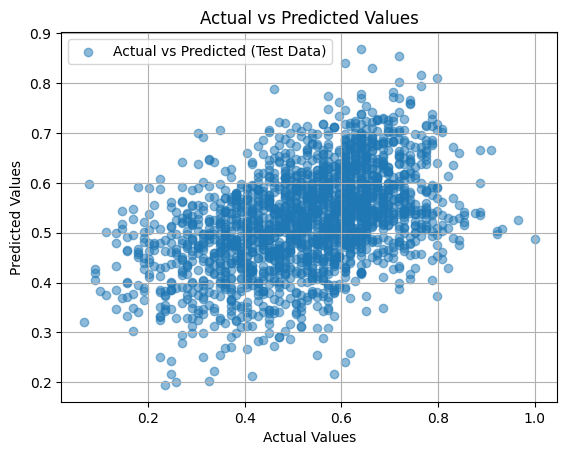

In [32]:
# Create a scatter plot for the test data
plt.scatter(y_test, y_pred_test, alpha=0.5,  label='Actual vs Predicted (Test Data)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True);


## Random Forest Model
A Random Forest is an ensemble machine learning technique that combines multiple decision trees to make more accurate predictions or classifications.Random Forest's ability to handle complexity, noise, and non-linearity, along with its feature importance analysis, makes it a suitable choice for the movie rating prediction.

In [33]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model 
rf_model.fit(X_train, y_train)

# Make predictions 
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

#### Random Forest model Evaluation

In [34]:
# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Random Forest Regressor Model Evaluation:")
print(f"Test Mean Squared Error: {mse_test}")
print(f"Test R-squared (R^2) Score: {r2_test}")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train R-squared (R^2) Score: {r2_train}")

Random Forest Regressor Model Evaluation:
Test Mean Squared Error: 0.01588196108184682
Test R-squared (R^2) Score: 0.3184788232217871
Train Mean Squared Error: 0.0023524026230225506
Train R-squared (R^2) Score: 0.8996427149295334


Year, votes and duration had the most significant impact.

## **Recommendations**
* from years : Adapt your content based on what's popular in recent years to enhance your movie's success.
* from votes : producers should actively encourage viewers to rate their movies. A higher number of votes leads to more reliable ratings. 
* from durations: Pay attention to the duration of your movies. Align it with your target audience's expectations. 
* Consider collaborating with directors and actors who have established themselves in the film industry. Notable figures like Mahesh Bhatt, Mithun Chakraborty, and Saif Ali Sayeed can enhance a project's credibility and appeal
* Invest in genres with the highest average ratings, such as History and Romance. 
